##Import libraries and datasets

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
movies=pd.read_fwf('/content/drive/MyDrive/Colab Notebooks/DS & ML/Projects/12. Zee recommendation/Copy of zee-movies.dat',encoding='ISO-8859-1')
users=pd.read_fwf('/content/drive/MyDrive/Colab Notebooks/DS & ML/Projects/12. Zee recommendation/Copy of zee-users.dat',encoding='ISO-8859-1')
ratings=pd.read_fwf('/content/drive/MyDrive/Colab Notebooks/DS & ML/Projects/12. Zee recommendation/Copy of zee-ratings.dat',encoding='ISO-8859-1')

##Problem statement & Formatting data

**The main theme is to recommend movies to the users based on the ratings they have given to the movies they watched.** 

1.   **This can be done by clearly observing the ratings of the movies he has given and suggesting similar movies if he rated good and avoiding those and recommending other genre movies if he rates bad**

2.  **The recommendation even can be done to user by observing peers and the high rated movies if he belong to that particular group with similar likings**

###Movies preprocessing

In [ ]:
# checking movies columns and info
movies

,Movie ID::Title::Genres,Unnamed: 1,Unnamed: 2
0,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN
2,3::Grumpier Old Men (1995)::Comedy|Romance,NaN,NaN
3,4::Waiting to Exhale (1995)::Comedy|Drama,NaN,NaN
4,5::Father of the Bride Part II (1995)::Comedy,NaN,NaN
...,...,...,...
3878,3948::Meet the Parents (2000)::Comedy,NaN,NaN
3879,3949::Requiem for a Dream (2000)::Drama,NaN,NaN
3880,3950::Tigerland (2000)::Drama,NaN,NaN
3881,3951::Two Family House (2000)::Drama,NaN,NaN


In [ ]:
# Dividing the movies first column to 3 columns
movies[['Movie_id','Title','Genres']]=movies['Movie ID::Title::Genres'].str.split("::",expand=True)

In [ ]:
movies.head(3)

,Movie ID::Title::Genres,Unnamed: 1,Unnamed: 2,Movie_id,Title,Genres
0,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN,1,Toy Story (1995),Animation|Children's|Comedy
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3::Grumpier Old Men (1995)::Comedy|Romance,NaN,NaN,3,Grumpier Old Men (1995),Comedy|Romance


In [ ]:
# dropping the first 3 columns
movies.drop(movies.columns[[0,1,2]],axis=1,inplace=True)

In [ ]:
movies.head(3)

,Movie_id,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [ ]:
# have to extract the year from Title so check for any null values
movies[movies['Title'].isna()]

,Movie_id,Title,Genres


In [ ]:
# checking whether all the titles have years at the end or not

movies['Title'].apply(lambda x: x.strip(":,),(").split(" (")[-1]).unique()

array(['1995', '1994', '1996',
       "Don't Be a Menace to South Central While Drinking Your Juice in the",
       '1976', '1993', '1992', '1988', '1967', '1964', '1977',
       'Die Macht der B', '1965', '1982', '1962', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1956', '1959', '1968', '1980', '1975', '1986', '1948', '1943',
       'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bo',
       '1950', '1946', '1987', '1997', "En compagnie d'Antonin Arta",
       '1974', 'Vieille qui marchait dans la', '1958', '1949', '1972',
       '1998', '1933', '1952', '1951', '1957', '1961', '1954', '1934',
       '1944', '1963', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1930', "L'Associe)(1982",
       '1971', '1979', '1966', '1978', '1985', '1983', '1984', '1931',
       '1922', '19', '1927', '1929', '195', '1928', '1925', '1923',
       '1999', "Travolti da un insolito

In [ ]:
# convert to int only if all the chars are int type
def is_numeric(x):
  if x.isnumeric():
    return int(x)
  else:
    return 'mode'

In [ ]:
# get the year column
movies['Year']=movies['Title'].apply(lambda x: is_numeric(x.strip(":,),(").split(" (")[-1]))

In [ ]:
movies['Year'].unique()

array([1995, 1994, 1996, 'mode', 1976, 1993, 1992, 1988, 1967, 1964, 1977,
       1965, 1982, 1962, 1990, 1991, 1989, 1937, 1940, 1969, 1981, 1973,
       1970, 1960, 1955, 1956, 1959, 1968, 1980, 1975, 1986, 1948, 1943,
       1950, 1946, 1987, 1997, 1974, 1958, 1949, 1972, 1998, 1933, 1952,
       1951, 1957, 1961, 1954, 1934, 1944, 1963, 1942, 1941, 1953, 1939,
       1947, 1945, 1938, 1935, 1936, 1926, 1932, 1930, 1971, 1979, 1966,
       1978, 1985, 1983, 1984, 1931, 1922, 19, 1927, 1929, 195, 1928,
       1925, 1923, 1999, 1919, 2000, 1, 1920, 1921], dtype=object)

In [ ]:
movies['Year'].value_counts().head(3)

1996    344
1995    342
1998    334
Name: Year, dtype: int64

In [ ]:
years=[1,19,195,'mode']

In [ ]:
for i in years:
  print(movies[movies['Year']==i].shape[0])

1
4
1
10


In [ ]:
# replace the errors in years to year with high value count
movies['Year']=movies['Year'].replace(['mode',1,19,195],[1996,1996,1996,1996])

In [ ]:
# unique years after replace
movies['Year'].unique()

array([1995, 1994, 1996, 1976, 1993, 1992, 1988, 1967, 1964, 1977, 1965,
       1982, 1962, 1990, 1991, 1989, 1937, 1940, 1969, 1981, 1973, 1970,
       1960, 1955, 1956, 1959, 1968, 1980, 1975, 1986, 1948, 1943, 1950,
       1946, 1987, 1997, 1974, 1958, 1949, 1972, 1998, 1933, 1952, 1951,
       1957, 1961, 1954, 1934, 1944, 1963, 1942, 1941, 1953, 1939, 1947,
       1945, 1938, 1935, 1936, 1926, 1932, 1930, 1971, 1979, 1966, 1978,
       1985, 1983, 1984, 1931, 1922, 1927, 1929, 1928, 1925, 1923, 1999,
       1919, 2000, 1920, 1921])

In [ ]:
# convert the string genres to list
movies['Genres']=movies['Genres'].str.split("|")

In [ ]:
# explode the genres column
movies=movies.explode('Genres')

In [ ]:
movies.head(10)

,Movie_id,Title,Genres,Year
0,1,Toy Story (1995),Animation,1995
0,1,Toy Story (1995),Children's,1995
0,1,Toy Story (1995),Comedy,1995
1,2,Jumanji (1995),Adventure,1995
1,2,Jumanji (1995),Children's,1995
1,2,Jumanji (1995),Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy,1995
2,3,Grumpier Old Men (1995),Romance,1995
3,4,Waiting to Exhale (1995),Comedy,1995
3,4,Waiting to Exhale (1995),Drama,1995


In [ ]:
# genres befor cleaning
movies['Genres'].unique()

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', None,
       'Film-Noir', 'Dram', 'Western', 'Chil', '', 'Fantas', 'Dr', 'D',
       'Documenta', 'Wester', 'Fant', 'Music', 'Childre', 'Childr', 'Rom',
       'Animati', 'Children', 'Come', "Children'", 'Sci-F', 'Adv',
       'Adventu', 'Horro', 'Docu', 'S', 'Sci-', 'Document', 'Th', 'Roman',
       'Documen', 'We', 'F', 'Ro', 'R', 'Sci', 'Chi', 'Thri', 'Adventur',
       'Advent', 'Acti', 'Roma', 'A', 'Comed', 'Com', 'Thrille', 'Wa',
       'Horr'], dtype=object)

In [ ]:
# check the movies with genre as D belong to Drama or documentary
movies[movies['Movie_id'].isin(movies[movies['Genres']=='D']['Movie_id'])]

,Movie_id,Title,Genres,Year
341,345,"Adventures of Priscilla, Queen of the Desert, ...",Comedy,1994
341,345,"Adventures of Priscilla, Queen of the Desert, ...",D,1994
781,791,"Last Klezmer: Leopold Kozlowski, His Life and ...",D,1995
2622,2691,"Legend of 1900, The (Leggenda del pianista sul...",D,1998


In [ ]:
# only this movie is documentary
movies.loc[(movies['Movie_id']=='2691'),'Genres']='Documentary'           #leopold changed from d to documentary

In [ ]:
# replace the errors in genres to actual genres

movies['Genres']=movies['Genres'].replace(["Dram","Children's","Chil","Fantas","Dr","D","Documenta",
                                           "Wester","Fant","Childre","Childr","Rom",
                                           "Animati","Come","Children'","Sci-F","Adv","Adventu",
                                           'Horro', 'Docu', 'S', 'Sci-', 'Document', 'Th', 'Roman',
                                            'Documen', 'We', 'F', 'Ro', 'R', 'Sci', 'Chi', 
                                           'Thri', 'Adventur','Advent', 'Acti', 'Roma', 'A', 'Comed', 'Com', 
                                           'Thrille', 'Wa','Horr'

                                           ],
                                          ["Drama","Children","Children","Fantasy","Drama","Drama","Documentary",
                                           "Western","Fantasy","Children","Children","Romance",
                                           "Animation","Comedy","children","Sci-Fi","Adventure","Adventure",
                                           "Horror","Documentary","Sci-Fi","Sci-Fi","Documentary","Thriller","Romance",
                                            "Documentary","Western","Fantasy","Romance","Romance","Sci-Fi","Children",
                                           "Thriller","Adventure","Adventure","Action","Romance","Adventure","Comedy","Comedy",
                                           "Thriller","War","Horror"
                                           ])

In [ ]:
# after cleaning genres
movies['Genres'].unique()

array(['Animation', 'Children', 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', None,
       'Film-Noir', 'Western', '', 'Music', 'children'], dtype=object)

In [ ]:
# now change the null values and missing values with mode of genres
movies[movies['Genres'].isna()]

,Movie_id,Title,Genres,Year
62,63,Don't Be a Menace to South Central While Drink...,None,1996
197,199,"Umbrellas of Cherbourg, The (Parapluies de Che...",None,1964
359,363,"Wonderful, Horrible Life of Leni Riefenstahl, ...",None,1996
464,468,"Englishman Who Went Up a Hill, But Came Down a...",None,1995
720,729,"Institute Benjamenta, or This Dream People Cal...",None,1995
740,750,Dr. Strangelove or: How I Learned to Stop Worr...,None,1996
783,793,My Life and Times With Antonin Artaud (En comp...,None,1996
787,797,"Old Lady Who Walked in the Sea, The (Vieille q...",None,1996
1134,1150,"Return of Martin Guerre, The (Retour de Martin...",None,1982
1160,1176,"Double Life of Veronique, The (La Double Vie d...",None,1991


In [ ]:
movies[movies['Genres']=='']

,Movie_id,Title,Genres,Year
255,258,"Kid in King Arthur's Court, A (1995)",,1995
262,265,Like Water for Chocolate (Como agua para choco...,,1992
1187,1205,"Transformers: The Movie, The (1986)",,1986
1286,1306,Until the End of the World (Bis ans Ende der W...,,1991
1339,1360,Identification of a Woman (Identificazione di ...,,1982
2073,2142,"American Tail: Fievel Goes West, An (1991)",,1991
2636,2705,"Late August, Early September (Fin août, début ...",,1998
3794,3864,Godzilla 2000 (Gojira ni-sen mireniamu) (1999),,1999


In [ ]:
movies['Genres'].mode()[0]

'Drama'

In [ ]:
movies['Genres']=movies['Genres'].replace([''],['Drama'])

In [ ]:
movies['Genres'].fillna(movies['Genres'].mode()[0],inplace=True)

In [ ]:
movies.head(10),movies.shape

(  Movie_id                     Title     Genres  Year
 0        1          Toy Story (1995)  Animation  1995
 0        1          Toy Story (1995)   Children  1995
 0        1          Toy Story (1995)     Comedy  1995
 1        2            Jumanji (1995)  Adventure  1995
 1        2            Jumanji (1995)   Children  1995
 1        2            Jumanji (1995)    Fantasy  1995
 2        3   Grumpier Old Men (1995)     Comedy  1995
 2        3   Grumpier Old Men (1995)    Romance  1995
 3        4  Waiting to Exhale (1995)     Comedy  1995
 3        4  Waiting to Exhale (1995)      Drama  1995, (6366, 4))

In [ ]:
# now implode as we want to merge the movies with ratings and users
movies=movies.groupby(['Movie_id','Title']).agg({'Genres':lambda x:x.to_list(),'Year':'mean'})

In [ ]:
movies.reset_index(inplace=True)

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Movie_id  3883 non-null   object 
 1   Title     3883 non-null   object 
 2   Genres    3883 non-null   object 
 3   Year      3883 non-null   float64
dtypes: float64(1), object(3)
memory usage: 121.5+ KB


In [ ]:
movies

,Movie_id,Title,Genres,Year
0,1,Toy Story (1995),"[Animation, Children, Comedy]",1995.0
1,10,GoldenEye (1995),"[Action, Adventure, Thriller]",1995.0
2,100,City Hall (1996),"[Drama, Thriller]",1996.0
3,1000,Curdled (1996),[Crime],1996.0
4,1001,"Associate, The (L'Associe)(1982)",[Comedy],1996.0
...,...,...,...,...
3878,994,Big Night (1996),[Drama],1996.0
3879,996,Last Man Standing (1996),"[Action, Drama, Western]",1996.0
3880,997,Caught (1996),"[Drama, Thriller]",1996.0
3881,998,Set It Off (1996),"[Action, Crime]",1996.0


###users preprocessing

In [ ]:
users[['User_id','Gender','Age','Occupation','Zip_code']]=users[users.columns[0]].str.split("::",expand=True)

In [ ]:
users.drop(columns=[users.columns[0]],axis=1,inplace=True)

In [ ]:
users

,User_id,Gender,Age,Occupation,Zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User_id     6040 non-null   object
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   object
 3   Occupation  6040 non-null   object
 4   Zip_code    6040 non-null   object
dtypes: object(5)
memory usage: 236.1+ KB


In [ ]:
users['Gender']=users['Gender'].replace(['F','M'],['0','1'])

In [ ]:
users

,User_id,Gender,Age,Occupation,Zip_code
0,1,0,1,10,48067
1,2,1,56,16,70072
2,3,1,25,15,55117
3,4,1,45,7,02460
4,5,1,25,20,55455
...,...,...,...,...,...
6035,6036,0,25,15,32603
6036,6037,0,45,1,76006
6037,6038,0,56,1,14706
6038,6039,0,45,0,01060


In [ ]:
users['Age'].unique()

array(['1', '56', '25', '45', '50', '35', '18'], dtype=object)

In [ ]:
users['Age']=users['Age'].replace(['1','18','25','35','45','50','56'],['Under 18','18-24','25-34','35-44','45-49','50-55','56+'])

In [ ]:
users['Age'].unique()

array(['Under 18', '56+', '25-34', '45-49', '50-55', '35-44', '18-24'],
      dtype=object)

In [ ]:
users['Occupation'].unique()

array(['10', '16', '15', '7', '20', '9', '1', '12', '17', '0', '3', '14',
       '4', '11', '8', '19', '2', '18', '5', '13', '6'], dtype=object)

In [ ]:
b=['other','academic/educator','artist','clerical/admin','college/grad student','customer service',
   'doctor/health care','executive/managerial','farmer','homemaker','k-12 student','lawyer','programmer','retired',
   'sales/marketing','scientist','self-employed','technician/engineer','tradesman/craftsman','unemployed','writer']

In [ ]:
a=(list((range(0,21))))
a=list(map(lambda x:str(x),a))

In [ ]:
users['Occupation']=users['Occupation'].replace(a,b)

In [ ]:
users['Occupation'].unique()

array(['k-12 student', 'self-employed', 'scientist',
       'executive/managerial', 'writer', 'homemaker', 'academic/educator',
       'programmer', 'technician/engineer', 'other', 'clerical/admin',
       'sales/marketing', 'college/grad student', 'lawyer', 'farmer',
       'unemployed', 'artist', 'tradesman/craftsman', 'customer service',
       'retired', 'doctor/health care'], dtype=object)

In [ ]:
users.head(4)

,User_id,Gender,Age,Occupation,Zip_code
0,1,0,Under 18,k-12 student,48067
1,2,1,56+,self-employed,70072
2,3,1,25-34,scientist,55117
3,4,1,45-49,executive/managerial,02460


In [ ]:
users.isna().sum()

User_id       0
Gender        0
Age           0
Occupation    0
Zip_code      0
dtype: int64

In [ ]:
users_df=users

In [ ]:
ratings[['User_id','Movie_id','Rating','Timestamp']]=ratings[ratings.columns[0]].str.split("::",expand=True)

In [ ]:
ratings.drop(columns=[ratings.columns[0]],inplace=True)

In [ ]:
ratings

,User_id,Movie_id,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [ ]:
ratings_df=ratings

### merge the 3 datasets to a dataframe

In [ ]:
users.head(),movies.head(),ratings.head()

(  User_id Gender       Age            Occupation Zip_code
 0       1      0  Under 18          k-12 student    48067
 1       2      1       56+         self-employed    70072
 2       3      1     25-34             scientist    55117
 3       4      1     45-49  executive/managerial    02460
 4       5      1     25-34                writer    55455,
   Movie_id                             Title                         Genres  \
 0        1                  Toy Story (1995)  [Animation, Children, Comedy]   
 1       10                  GoldenEye (1995)  [Action, Adventure, Thriller]   
 2      100                  City Hall (1996)              [Drama, Thriller]   
 3     1000                    Curdled (1996)                        [Crime]   
 4     1001  Associate, The (L'Associe)(1982)                       [Comedy]   
 
      Year  
 0  1995.0  
 1  1995.0  
 2  1996.0  
 3  1996.0  
 4  1996.0  ,
   User_id Movie_id Rating  Timestamp
 0       1     1193      5  978300760
 1      

In [ ]:
movies.describe(include='all')

,Movie_id,Title,Genres,Year
count,3883,3883,3883,3883.000000
unique,3883,3883,300,NaN
top,1,Toy Story (1995),[Drama],NaN
freq,1,1,860,NaN
mean,NaN,NaN,NaN,1986.131857
std,NaN,NaN,NaN,16.865016
min,NaN,NaN,NaN,1919.000000
25%,NaN,NaN,NaN,1982.000000
50%,NaN,NaN,NaN,1994.000000
75%,NaN,NaN,NaN,1997.000000


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   User_id    1000209 non-null  object
 1   Movie_id   1000209 non-null  object
 2   Rating     1000209 non-null  object
 3   Timestamp  1000209 non-null  object
dtypes: object(4)
memory usage: 30.5+ MB


In [ ]:
df=ratings.merge(users,left_on='User_id',right_on='User_id')

In [ ]:
df

,User_id,Movie_id,Rating,Timestamp,Gender,Age,Occupation,Zip_code
0,1,1193,5,978300760,0,Under 18,k-12 student,48067
1,1,661,3,978302109,0,Under 18,k-12 student,48067
2,1,914,3,978301968,0,Under 18,k-12 student,48067
3,1,3408,4,978300275,0,Under 18,k-12 student,48067
4,1,2355,5,978824291,0,Under 18,k-12 student,48067
...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,1,25-34,doctor/health care,11106
1000205,6040,1094,5,956704887,1,25-34,doctor/health care,11106
1000206,6040,562,5,956704746,1,25-34,doctor/health care,11106
1000207,6040,1096,4,956715648,1,25-34,doctor/health care,11106


In [ ]:
df1=df.merge(movies,left_on='Movie_id',right_on='Movie_id')
# df1

In [ ]:
df1.sort_values(by=['User_id'],ascending=True,inplace=True)

The above one is the combined dataset and now do EDA.

##Performing EDA, data cleaning and Feature Engineering

Cleaning and Feature Engineering were done in the above section

In [ ]:
df1.shape

(1000209, 11)

In [ ]:
df1.isna().sum()

User_id       0
Movie_id      0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip_code      0
Title         0
Genres        0
Year          0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 523627
Data columns (total 11 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   User_id     1000209 non-null  object 
 1   Movie_id    1000209 non-null  object 
 2   Rating      1000209 non-null  object 
 3   Timestamp   1000209 non-null  object 
 4   Gender      1000209 non-null  object 
 5   Age         1000209 non-null  object 
 6   Occupation  1000209 non-null  object 
 7   Zip_code    1000209 non-null  object 
 8   Title       1000209 non-null  object 
 9   Genres      1000209 non-null  object 
 10  Year        1000209 non-null  float64
dtypes: float64(1), object(10)
memory usage: 91.6+ MB


In [ ]:
# convert timestamp from int to date
# convert ratings to float

df1['Timestamp']=df1['Timestamp'].astype('int64')
df1['Timestamp']=df1['Timestamp'].astype('datetime64[s]')
df1['Rating']=df1['Rating'].astype('float64')

In [ ]:
numerical_columns=df1.select_dtypes(include=np.number).columns
categorical_columns=df1.select_dtypes(include=['object']).columns
numerical_columns,categorical_columns

(Index(['Rating', 'Year'], dtype='object'),
 Index(['User_id', 'Movie_id', 'Gender', 'Age', 'Occupation', 'Zip_code',
        'Title', 'Genres'],
       dtype='object'))

In [ ]:
df1.groupby(['Occupation',"User_id"])['Rating'].count().reset_index().sort_values(by=['Rating'],ascending=False)

,Occupation,User_id,Rating
3593,other,4169,2314
5807,writer,1680,1850
5019,self-employed,4277,1743
5192,technician/engineer,1941,1595
2098,executive/managerial,1181,1521
...,...,...,...
1006,college/grad student,1406,20
3498,other,3530,20
5410,technician/engineer,4192,20
5421,technician/engineer,4244,20


**Each user has atleat 20 ratings and max with user_id 4169 with 2314 ratings**

In [ ]:
Occupation_wise_ratings=df1.groupby(['Occupation',"User_id"])['Rating'].count().reset_index().sort_values(by=['Rating'],ascending=False).groupby(['Occupation'])['Rating'].sum().reset_index()
Occupation_wise_ratings.sort_values(by=['Rating'],ascending=False,inplace=True)

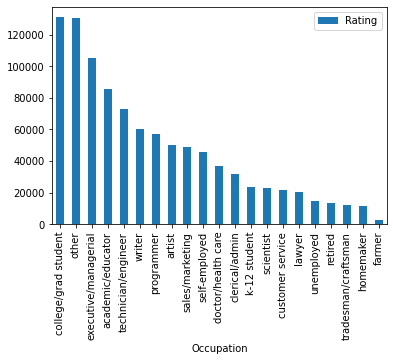

In [ ]:
Occupation_wise_ratings.plot.bar(x='Occupation',y='Rating')
plt.show()

***There were total ratings of more than 10,00,000 and among all students has given more ratings and farmer with less no of ratings***




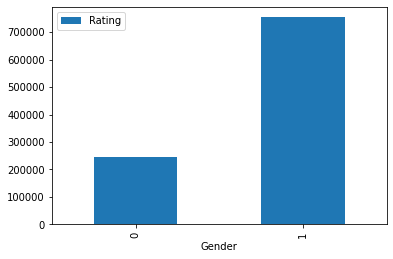

In [ ]:
Gender_wise_ratings=df1.groupby(['Gender',"User_id"])['Rating'].count().reset_index().sort_values(by=['Rating'],ascending=False).groupby(['Gender'])['Rating'].sum().reset_index()
Gender_wise_ratings.plot.bar(x='Gender',y='Rating')
plt.show()

***Male has given more ratings than Female***

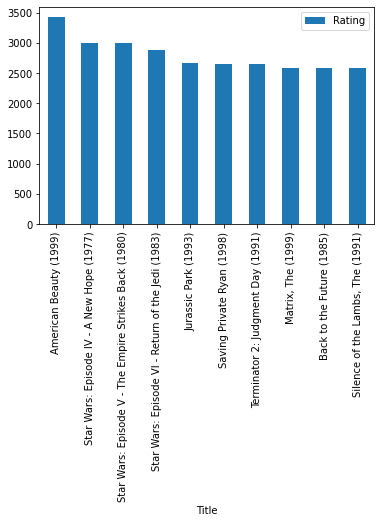

In [ ]:
# the top 10 movies which are rated more in count

Movie_wise_rating=df1.groupby(['Title'])['Rating'].count().reset_index().sort_values(by=['Rating'],ascending=False)
Movie_wise_rating.head(10)
Movie_wise_rating.head(10).plot.bar(x='Title',y='Rating')
plt.show()

***The above are top movies with more ratings count***

In [ ]:
# the movies with highest average rating
df1['User_id_avg_rating']=df1.groupby(['User_id'])['Rating'].transform('mean').round(1)
df1['User_id_ratings_count']=df1.groupby(['User_id'])['Rating'].transform('count')
df1['Movie_watched_by_users']=df1.groupby(['Movie_id'])['Rating'].transform('count')
df1['Movie_avg_rating']=df1.groupby(['Movie_id'])['Rating'].transform('mean').round(1)

In [ ]:
df1.head(5)

,User_id,Movie_id,Rating,Timestamp,Gender,Age,Occupation,Zip_code,Title,Genres,Year,User_id_avg_rating,User_id_ratings_count,Movie_watched_by_users,Movie_avg_rating
0,1,1193,5.0,2000-12-31 22:12:40,0,Under 18,k-12 student,48067,One Flew Over the Cuckoo's Nest (1975),[Drama],1975.0,4.2,53,1725,4.4
36814,1,783,4.0,2001-01-06 23:38:11,0,Under 18,k-12 student,48067,"Hunchback of Notre Dame, The (1996)","[Animation, Children, Musical]",1996.0,4.2,53,390,3.2
36324,1,1907,4.0,2001-01-06 23:38:50,0,Under 18,k-12 student,48067,Mulan (1998),"[Animation, Children]",1998.0,4.2,53,490,3.7
15859,1,1035,5.0,2000-12-31 22:29:13,0,Under 18,k-12 student,48067,"Sound of Music, The (1965)",[Musical],1965.0,4.2,53,882,3.9
34973,1,588,4.0,2001-01-06 23:37:48,0,Under 18,k-12 student,48067,Aladdin (1992),"[Animation, Children, Comedy, Musical]",1992.0,4.2,53,1351,3.8


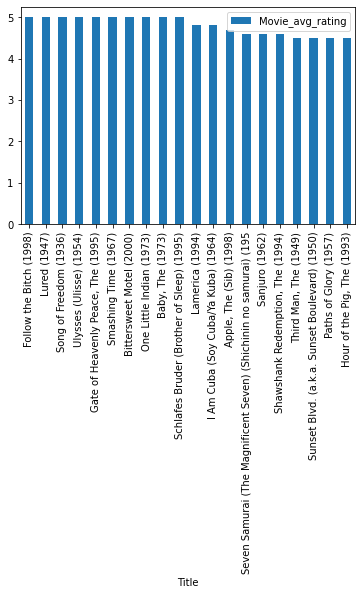

In [ ]:
Movie_avg_rating_df=df1.groupby(['Title'])['Movie_avg_rating'].mean().reset_index().sort_values(by=['Movie_avg_rating'],ascending=False)
Movie_avg_rating_df.head(20).plot.bar(x='Title',y='Movie_avg_rating')
plt.show()

***The above are top 20 movies with ratings 5,4.8,4.7,4.6,4.5***

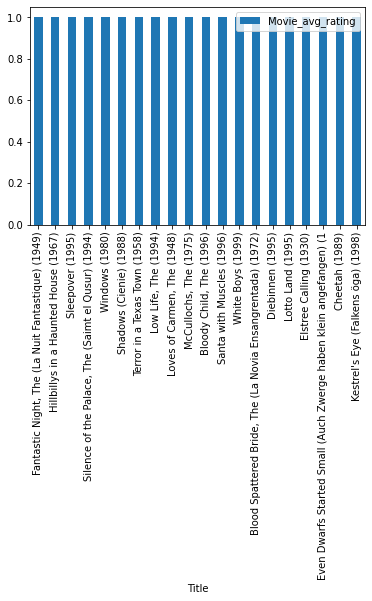

In [ ]:
Movie_avg_rating_df.tail(20).plot.bar(x='Title',y='Movie_avg_rating')
plt.show()

***The above are the movies with least ratings of 1***

In [ ]:
# users time zone
df1['users_watching_time_zone']=df1['Timestamp'].dt.hour

In [ ]:
def timeperiod(x):
  if x>=0 and x<6:
    return '12am-6am'
  if x>=6 and x<12:
    return '6am-12pm'
  if x>=12 and x<18:
    return '12pm-18pm'
  if x>=18 and x<24:
    return '18pm-12am'


In [ ]:
df1['users_watching_time_period']=df1['users_watching_time_zone'].apply(lambda x:timeperiod(x))

In [ ]:
df1

,User_id,Movie_id,Rating,Timestamp,Gender,Age,Occupation,Zip_code,Title,Genres,Year,User_id_avg_rating,User_id_ratings_count,Movie_watched_by_users,Movie_avg_rating,users_watching_time_zone,users_watching_time_period
0,1,1193,5.0,2000-12-31 22:12:40,0,Under 18,k-12 student,48067,One Flew Over the Cuckoo's Nest (1975),[Drama],1975.0,4.2,53,1725,4.4,22,18pm-12am
36814,1,783,4.0,2001-01-06 23:38:11,0,Under 18,k-12 student,48067,"Hunchback of Notre Dame, The (1996)","[Animation, Children, Musical]",1996.0,4.2,53,390,3.2,23,18pm-12am
36324,1,1907,4.0,2001-01-06 23:38:50,0,Under 18,k-12 student,48067,Mulan (1998),"[Animation, Children]",1998.0,4.2,53,490,3.7,23,18pm-12am
15859,1,1035,5.0,2000-12-31 22:29:13,0,Under 18,k-12 student,48067,"Sound of Music, The (1965)",[Musical],1965.0,4.2,53,882,3.9,22,18pm-12am
34973,1,588,4.0,2001-01-06 23:37:48,0,Under 18,k-12 student,48067,Aladdin (1992),"[Animation, Children, Comedy, Musical]",1992.0,4.2,53,1351,3.8,23,18pm-12am
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352375,999,1221,4.0,2000-11-24 05:31:06,1,25-34,scientist,62558,"Godfather: Part II, The (1974)","[Action, Crime, Drama]",1974.0,3.2,412,1692,4.4,5,12am-6am
615020,999,3261,3.0,2000-11-27 22:27:03,1,25-34,scientist,62558,Singles (1992),"[Comedy, Drama, Romance]",1992.0,3.2,412,429,3.5,22,18pm-12am
106004,999,2852,4.0,2000-11-27 22:14:38,1,25-34,scientist,62558,"Soldier's Story, A (1984)",[Drama],1984.0,3.2,412,164,3.7,22,18pm-12am
927164,999,1004,3.0,2000-11-24 06:21:15,1,25-34,scientist,62558,"Glimmer Man, The (1996)","[Action, Thriller]",1996.0,3.2,412,101,2.7,6,6am-12pm


In [ ]:
df1['users_watching_time_period'].value_counts().reset_index()

,index,users_watching_time_period
0,18pm-12am,348712
1,12am-6am,332591
2,12pm-18pm,205907
3,6am-12pm,112999


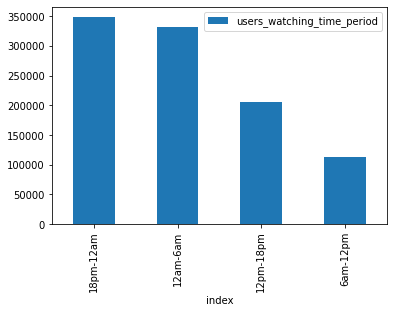

In [ ]:
df1['users_watching_time_period'].value_counts().reset_index().plot.bar(x='index',y='users_watching_time_period')
plt.show()

***Majority of users are watching movies during 18pm-12am and 12am-6am***

In [ ]:
##year wise movies
df1['Year'].describe()

count    1.000209e+06
mean     1.986780e+03
std      1.429661e+01
min      1.919000e+03
25%      1.982000e+03
50%      1.992000e+03
75%      1.997000e+03
max      2.000000e+03
Name: Year, dtype: float64

In [ ]:
df1['decade']=pd.cut(x=df1['Year'],bins=[1909,1919,1929,1939,1949,1959,1969,1979,1989,1999,2009],
                     labels=['10s','20s','30s','40s','50s','60s','70s','80s','90s','early 2000'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


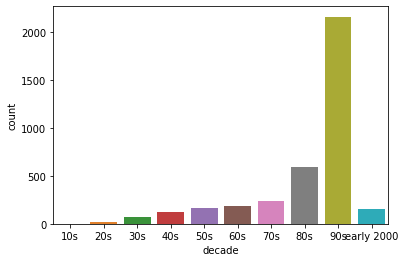

In [ ]:
sns.countplot((df1[['Movie_id','decade']].drop_duplicates())['decade'])
plt.show()

***90's films are more followed by 80's and 70's***

In [ ]:
#age wise top 1 movie watched and rated by users

age_wise_movie_rated_by_users_count=df1.groupby(['Age','Movie_id','Title']).agg(users_count=('Title','count')).reset_index()

In [ ]:
age_wise_movie_rated_by_users_count

,Age,Movie_id,Title,users_count
0,18-24,1,Toy Story (1995),448
1,18-24,10,GoldenEye (1995),216
2,18-24,100,City Hall (1996),17
3,18-24,1000,Curdled (1996),6
4,18-24,1002,Ed's Next Move (1996),3
...,...,...,...,...
22452,Under 18,991,Michael Collins (1996),3
22453,Under 18,994,Big Night (1996),2
22454,Under 18,996,Last Man Standing (1996),5
22455,Under 18,998,Set It Off (1996),1


In [ ]:
age_wise_movie_rated_by_users_count['max_count']=age_wise_movie_rated_by_users_count.groupby(['Age'])['users_count'].transform('max')

In [ ]:
age_wise_movie_rated_by_users_count[age_wise_movie_rated_by_users_count['users_count']==age_wise_movie_rated_by_users_count['max_count']].iloc[:,0:4]

,Age,Movie_id,Title,users_count
1792,18-24,2858,American Beauty (1999),715
5232,25-34,2858,American Beauty (1999),1334
8445,35-44,260,Star Wars: Episode IV - A New Hope (1977),626
12065,45-49,2858,American Beauty (1999),258
15335,50-55,2858,American Beauty (1999),248
18406,56+,2858,American Beauty (1999),184
19807,Under 18,1,Toy Story (1995),112


***The above movies are the top watched movies per each age group***

In [ ]:
#top 2 movies & and bottom 2 movies per each age group

age_wise_movie_rated_by_users_count['rank']=age_wise_movie_rated_by_users_count.groupby(['Age'])['users_count'].rank(method='dense',ascending=False)

In [ ]:
age_wise_movie_rated_by_users_count[age_wise_movie_rated_by_users_count['rank'].isin([1,2])]

,Age,Movie_id,Title,users_count,max_count,rank
195,18-24,1210,Star Wars: Episode VI - Return of the Jedi (1983),586,715,2.0
1792,18-24,2858,American Beauty (1999),715,715,1.0
3573,25-34,1196,Star Wars: Episode V - The Empire Strikes Back...,1176,1334,2.0
5232,25-34,2858,American Beauty (1999),1334,1334,1.0
7076,35-44,1196,Star Wars: Episode V - The Empire Strikes Back...,598,626,2.0
8445,35-44,260,Star Wars: Episode IV - A New Hope (1977),626,626,1.0
11819,45-49,260,Star Wars: Episode IV - A New Hope (1977),243,258,2.0
12065,45-49,2858,American Beauty (1999),258,258,1.0
15088,50-55,260,Star Wars: Episode IV - A New Hope (1977),215,248,2.0
15335,50-55,2858,American Beauty (1999),248,248,1.0


***The above are top 2 movies in each group***

In [ ]:
age_wise_movie_rated_by_users_count['rank']=age_wise_movie_rated_by_users_count.groupby(['Age'])['users_count'].rank(method='dense')

In [ ]:
age_wise_movie_rated_by_users_count[age_wise_movie_rated_by_users_count['rank'].isin([1,2])]

,Age,Movie_id,Title,users_count,max_count,rank
30,18-24,1026,So Dear to My Heart (1949),2,715,2.0
43,18-24,1038,Unhook the Stars (1996),1,715,1.0
44,18-24,1039,Synthetic Pleasures (1995),1,715,1.0
46,18-24,1040,"Secret Agent, The (1996)",2,715,2.0
50,18-24,1044,Surviving Picasso (1996),2,715,2.0
...,...,...,...,...,...,...
22447,Under 18,978,"Blue Angel, The (Blaue Engel, Der) (1930)",1,112,1.0
22450,Under 18,988,Grace of My Heart (1996),1,112,1.0
22451,Under 18,99,Heidi Fleiss: Hollywood Madam (1995),1,112,1.0
22453,Under 18,994,Big Night (1996),2,112,2.0


***The above are least watched and rated movies from each age group***

In [ ]:
# Most watched top 10 movies across all age groups

df1.groupby(['Title'])['Movie_id'].count().reset_index().sort_values(by=['Movie_id'],ascending=False).head(10)

,Title,Movie_id
127,American Beauty (1999),3428
3153,Star Wars: Episode IV - A New Hope (1977),2991
3154,Star Wars: Episode V - The Empire Strikes Back...,2990
3155,Star Wars: Episode VI - Return of the Jedi (1983),2883
1789,Jurassic Park (1993),2672
2894,Saving Private Ryan (1998),2653
3293,Terminator 2: Judgment Day (1991),2649
2112,"Matrix, The (1999)",2590
258,Back to the Future (1985),2583
2990,"Silence of the Lambs, The (1991)",2578


***The above are the top 10 movies watched by users***

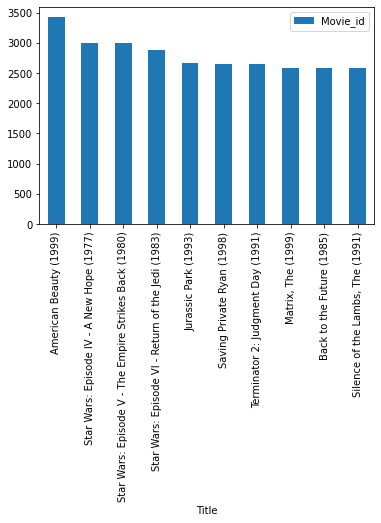

In [ ]:
df1.groupby(['Title'])['Movie_id'].count().reset_index().sort_values(by=['Movie_id'],ascending=False).head(10).plot.bar(x='Title',y='Movie_id')
plt.show()

In [ ]:
df1.head(3)

,User_id,Movie_id,Rating,Timestamp,Gender,Age,Occupation,Zip_code,Title,Genres,Year,User_id_avg_rating,User_id_ratings_count,Movie_watched_by_users,Movie_avg_rating,users_watching_time_zone,users_watching_time_period,decade
0,1,1193,5.0,2000-12-31 22:12:40,0,Under 18,k-12 student,48067,One Flew Over the Cuckoo's Nest (1975),[Drama],1975.0,4.2,53,1725,4.4,22,18pm-12am,70s
36814,1,783,4.0,2001-01-06 23:38:11,0,Under 18,k-12 student,48067,"Hunchback of Notre Dame, The (1996)","[Animation, Children, Musical]",1996.0,4.2,53,390,3.2,23,18pm-12am,90s
36324,1,1907,4.0,2001-01-06 23:38:50,0,Under 18,k-12 student,48067,Mulan (1998),"[Animation, Children]",1998.0,4.2,53,490,3.7,23,18pm-12am,90s


In [ ]:
#Users with top ratings and low ratings
df1[['User_id','User_id_avg_rating']].drop_duplicates().sort_values(by=['User_id_avg_rating'],ascending=False).iloc[:10]

,User_id,User_id_avg_rating
861513,2339,5.0
52389,283,5.0
410027,3324,4.9
390984,3902,4.9
1428,5069,4.8
262292,4925,4.8
924120,4649,4.8
5542,4755,4.8
322822,446,4.8
824411,4634,4.8


***The above are the user id's with highest ratings and they are not particulat about movies***

In [ ]:
df1[['User_id','User_id_avg_rating']].drop_duplicates().sort_values(by=['User_id_avg_rating'],ascending=True).iloc[:10]

,User_id,User_id_avg_rating
663510,3598,1.0
337268,4486,1.1
576891,2744,1.3
736538,4539,1.8
897577,5850,1.8
578612,5334,1.9
989672,4349,2.0
470454,5686,2.0
191637,4636,2.0
290664,4575,2.1


***The above users are very particulate and they are like critics and thus rating is less***

##Build recommender based on pearson Correlation

###unstack of movies with respect to genres

In [ ]:
# explode and unstack for item item similarity
movies_df=movies.explode('Genres')

movies_df.reset_index(inplace=True,drop=True)

In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Movie_id  6366 non-null   object 
 1   Title     6366 non-null   object 
 2   Genres    6366 non-null   object 
 3   Year      6366 non-null   float64
dtypes: float64(1), object(3)
memory usage: 199.1+ KB


Create dataframe with genres as columns and the title as count for each movie

In [ ]:
movies_df

,Movie_id,Title,Genres,Year
0,1,Toy Story (1995),Animation,1995.0
1,1,Toy Story (1995),Children,1995.0
2,1,Toy Story (1995),Comedy,1995.0
3,10,GoldenEye (1995),Action,1995.0
4,10,GoldenEye (1995),Adventure,1995.0
...,...,...,...,...
6361,997,Caught (1996),Drama,1996.0
6362,997,Caught (1996),Thriller,1996.0
6363,998,Set It Off (1996),Action,1996.0
6364,998,Set It Off (1996),Crime,1996.0


In [ ]:
movies_df=movies_df.pivot_table(index=["Movie_id"],columns=['Genres'],values=['Title'],aggfunc='count')

In [ ]:
movies_df.isna().sum(axis=0)

       Genres     
Title  Action         3382
       Adventure      3600
       Animation      3779
       Children       3635
       Comedy         2694
       Crime          3673
       Documentary    3758
       Drama          2268
       Fantasy        3820
       Film-Noir      3839
       Horror         3543
       Music          3882
       Musical        3771
       Mystery        3778
       Romance        3421
       Sci-Fi         3618
       Thriller       3395
       War            3744
       Western        3815
       children       3882
dtype: int64

In [ ]:
movies_df=(~movies_df.isna()).astype(int)
movies_df

Title                                                              \
Genres   Action Adventure Animation Children Comedy Crime Documentary Drama   
Movie_id                                                                      
1             0         0         1        1      1     0           0     0   
10            1         1         0        0      0     0           0     0   
100           0         0         0        0      0     0           0     1   
1000          0         0         0        0      0     1           0     0   
1001          0         0         0        0      1     0           0     0   
...         ...       ...       ...      ...    ...   ...         ...   ...   
994           0         0         0        0      0     0           0     1   
996           1         0         0        0      0     0           0     1   
997           0         0         0        0      0     0           0     1   
998           1         0         0        0      0     1           0     0   
999           0         0         0        0      0     1           0     0   

                                                                        \
Genres   Fantasy Film-Noir Horror Music Musical Mystery Romance Sci-Fi   
Movie_id                                                                 
1              0         0      0     0       0       0       0      0   
10             0         0      0     0       0       0       0      0   
100            0         0      0     0       0       0       0      0   
1000           0         0      0     0       0       0       0      0   
1001           0         0      0     0       0       0       0      0   
...          ...       ...    ...   ...     ...     ...     ...    ...   
994            0         0      0     0       0       0       0      0   
996            0         0      0     0       0       0       0      0   
997            0         0      0     0       0       0       0      0   
998            0         0      0     0       0       0       0      0   
999            0         0      0     0       0       0       0      0   

                                        
Genres   Thriller War Western children  
Movie_id                                
1               0   0       0        0  
10              1   0       0        0  
100             1   0       0        0  
1000            0   0       0        0  
1001            0   0       0        0  
...           ...  ..     ...      ...  
994             0   0       0        0  
996             0   0       1        0  
997             1   0       0        0  
998             0   0       0        0  
999             0   0       0        0  

[3883 rows x 20 columns]

In [ ]:
movies_df.columns=movies_df.columns.droplevel(0)

In [ ]:
movies_df.columns

Index(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'children'],
      dtype='object', name='Genres')

In [ ]:
movies_df.columns=['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'children']

In [ ]:
movies_df.reset_index(inplace=True)

In [ ]:
movies_df

,Movie_id,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,children
0,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,100,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1000,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1001,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,994,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3879,996,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3880,997,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3881,998,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
movies_df.set_index('Movie_id',inplace=True)

In [ ]:
movies_df

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,children
Movie_id,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
100,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
996,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
997,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
movies_df_T=movies_df.T
movies_df_T

Movie_id,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,99,990,991,992,993,994,996,997,998,999
Action,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
Adventure,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Animation,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Children,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,1,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Crime,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
Documentary,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Drama,0,0,1,0,0,0,1,0,0,1,...,0,0,1,0,1,1,1,1,0,0
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Film-Noir,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###item item similarity matrix based on pearson correlation

In [ ]:
correlation_matrix=movies_df_T.corr(method='pearson')
correlation_matrix

Movie_id,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,99,990,991,992,993,994,996,997,998,999
Movie_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.176471,-0.140028,-0.096374,0.546119,0.546119,-0.140028,-0.140028,0.793492,-0.096374,...,-0.096374,-0.176471,-0.140028,-0.096374,-0.096374,-0.096374,-0.176471,-0.140028,-0.140028,-0.096374
10,-0.176471,1.000000,0.326732,-0.096374,-0.096374,-0.096374,0.326732,0.793492,-0.140028,-0.096374,...,-0.096374,1.000000,-0.140028,0.546119,-0.096374,-0.096374,0.215686,0.326732,0.326732,-0.096374
100,-0.140028,0.326732,1.000000,-0.076472,-0.076472,-0.076472,1.000000,0.444444,-0.111111,0.688247,...,-0.076472,0.326732,0.444444,0.688247,0.688247,0.688247,0.326732,1.000000,-0.111111,-0.076472
1000,-0.096374,-0.096374,-0.076472,1.000000,-0.052632,-0.052632,-0.076472,-0.076472,-0.076472,-0.052632,...,-0.052632,-0.096374,-0.076472,-0.052632,-0.052632,-0.052632,-0.096374,-0.076472,0.688247,1.000000
1001,0.546119,-0.096374,-0.076472,-0.052632,1.000000,1.000000,-0.076472,-0.076472,0.688247,-0.052632,...,-0.052632,-0.096374,-0.076472,-0.052632,-0.052632,-0.052632,-0.096374,-0.076472,-0.076472,-0.052632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,-0.096374,-0.096374,0.688247,-0.052632,-0.052632,-0.052632,0.688247,-0.076472,-0.076472,1.000000,...,-0.052632,-0.096374,0.688247,-0.052632,1.000000,1.000000,0.546119,0.688247,-0.076472,-0.052632
996,-0.176471,0.215686,0.326732,-0.096374,-0.096374,-0.096374,0.326732,0.326732,-0.140028,0.546119,...,-0.096374,0.215686,0.326732,-0.096374,0.546119,0.546119,1.000000,0.326732,0.326732,-0.096374
997,-0.140028,0.326732,1.000000,-0.076472,-0.076472,-0.076472,1.000000,0.444444,-0.111111,0.688247,...,-0.076472,0.326732,0.444444,0.688247,0.688247,0.688247,0.326732,1.000000,-0.111111,-0.076472


### recommending n similar movies based on wathed movie by user using pearson correlation similarity matrix

In [ ]:
print("HI, Please provide watched movie_id {1 to 3952} and no.of recommended movies you want")
watched_movie_id=(input())
print('No.of recommended_movies you want')
recommended_movies=int(input())

if watched_movie_id in movies['Movie_id'].values:
  # print('in')
  query=[watched_movie_id]*recommended_movies
  # print(query)
  # indices=(np.array(correlation_matrix.loc[watched_movie_id]).argsort())[::-1]

  candidate_column_ids=list(correlation_matrix.columns[list(np.array(correlation_matrix.loc[watched_movie_id]).argsort())[::-1]])
  candidate_column_ids.remove(watched_movie_id)
  candidate_column_ids=candidate_column_ids[:recommended_movies]
  # print(candidate_column_ids)
  correlation_values=list(correlation_matrix.loc[watched_movie_id,candidate_column_ids])[:recommended_movies]
  # print(correlation_values)
  


  df=pd.DataFrame({'query':query,'movie_id':candidate_column_ids,'pearson':correlation_values})
  df=df.merge(movies[['Movie_id', 'Title']], left_on='query', right_on='Movie_id').rename(columns={'Title': 'query_tittle'}).drop(columns=['Movie_id'])
  df=df.merge(movies[['Movie_id', 'Title']], left_on='movie_id', right_on='Movie_id').rename(columns={'Title': 'candidate_tittle'}).drop(columns=['Movie_id'])
  print(df)

else:
  print('Sorry, the id is not found, please try another')

HI, Please provide watched movie_id {1 to 3952} and no.of recommended movies you want
456
No.of recommended_movies you want
5
  query movie_id  pearson  query_tittle             candidate_tittle
0   456     3468      1.0  Fresh (1994)          Hustler, The (1961)
1   456     3449      1.0  Fresh (1994)      Good Mother, The (1988)
2   456     1730      1.0  Fresh (1994)                Kundun (1997)
3   456     1728      1.0  Fresh (1994)     Winter Guest, The (1997)
4   456     1727      1.0  Fresh (1994)  Horse Whisperer, The (1998)


##Build recommender based on cosine similarity for movies

###item item similarity matrix based on cosine similarity

In [ ]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

In [ ]:
movies_df

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,children
Movie_id,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
100,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
996,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
997,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# movies_df.index=movies_df.index.astype('int64')

In [ ]:
# movies_df.sort_index(axis=0,inplace=True)

In [ ]:
movies_df

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,children
Movie_id,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
100,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
996,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
997,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
cosine_similarity_array=(1-pairwise_distances(movies_df,metric='cosine'))
cosine_similarity_array

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.40824829, ..., 0.40824829, 0.40824829,
        0.        ],
       [0.        , 0.40824829, 1.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.40824829, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.40824829, 0.        , ..., 0.        , 1.        ,
        0.70710678],
       [0.        , 0.        , 0.        , ..., 0.        , 0.70710678,
        1.        ]])

In [ ]:
cosine_similarity_matrix=pd.DataFrame(cosine_similarity_array,columns=list(movies_df.index),index=list(movies_df.index))

In [ ]:
cosine_similarity_matrix

,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,99,990,991,992,993,994,996,997,998,999
1,1.00000,0.000000,0.000000,0.000000,0.57735,0.57735,0.000000,0.000000,0.816497,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,0.00000,1.000000,0.408248,0.000000,0.00000,0.00000,0.408248,0.816497,0.000000,0.000000,...,0.0,1.000000,0.000000,0.577350,0.000000,0.000000,0.333333,0.408248,0.408248,0.000000
100,0.00000,0.408248,1.000000,0.000000,0.00000,0.00000,1.000000,0.500000,0.000000,0.707107,...,0.0,0.408248,0.500000,0.707107,0.707107,0.707107,0.408248,1.000000,0.000000,0.000000
1000,0.00000,0.000000,0.000000,1.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,1.000000
1001,0.57735,0.000000,0.000000,0.000000,1.00000,1.00000,0.000000,0.000000,0.707107,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.00000,0.000000,0.707107,0.000000,0.00000,0.00000,0.707107,0.000000,0.000000,1.000000,...,0.0,0.000000,0.707107,0.000000,1.000000,1.000000,0.577350,0.707107,0.000000,0.000000
996,0.00000,0.333333,0.408248,0.000000,0.00000,0.00000,0.408248,0.408248,0.000000,0.577350,...,0.0,0.333333,0.408248,0.000000,0.577350,0.577350,1.000000,0.408248,0.408248,0.000000
997,0.00000,0.408248,1.000000,0.000000,0.00000,0.00000,1.000000,0.500000,0.000000,0.707107,...,0.0,0.408248,0.500000,0.707107,0.707107,0.707107,0.408248,1.000000,0.000000,0.000000
998,0.00000,0.408248,0.000000,0.707107,0.00000,0.00000,0.000000,0.500000,0.000000,0.000000,...,0.0,0.408248,0.000000,0.000000,0.000000,0.000000,0.408248,0.000000,1.000000,0.707107


### recommending n similar movies based on wathed movie by user using cosine similarity matrix

In [ ]:
(movies['Movie_id'].values)

array(['1', '10', '100', ..., '997', '998', '999'], dtype=object)

In [ ]:
print("HI, Please provide watched movie_id {1 to 3952} and no.of recommended movies you want")
watched_movie_id=(input())
print('No.of recommended_movies you want')
recommended_movies=int(input())

if (watched_movie_id) in movies['Movie_id'].values:
  # print('in')
  query=[watched_movie_id]*recommended_movies
  # print(query)
  # indices=(np.array(cosine_similarity_matrix.loc[watched_movie_id]).argsort())[::-1]

  candidate_column_ids=list(cosine_similarity_matrix.columns[list(np.array(cosine_similarity_matrix.loc[watched_movie_id]).argsort())[::-1]])
  candidate_column_ids.remove(watched_movie_id)
  candidate_column_ids=candidate_column_ids[:recommended_movies]
  # print(candidate_column_ids)
  correlation_values=list(cosine_similarity_matrix.loc[watched_movie_id,candidate_column_ids])[:recommended_movies]
  # print(correlation_values)
  


  df=pd.DataFrame({'query':query,'movie_id':candidate_column_ids,'cosine':correlation_values})
  df=df.merge(movies[['Movie_id', 'Title']], left_on='query', right_on='Movie_id').rename(columns={'Title': 'query_tittle'}).drop(columns=['Movie_id'])
  df=df.merge(movies[['Movie_id', 'Title']], left_on='movie_id', right_on='Movie_id').rename(columns={'Title': 'candidate_tittle'}).drop(columns=['Movie_id'])
  print(df)

else:
  print('Sorry, the id is not found, please try another')

HI, Please provide watched movie_id {1 to 3952} and no.of recommended movies you want
456
No.of recommended_movies you want
5
  query movie_id  cosine  query_tittle  \
0   456      233     1.0  Fresh (1994)   
1   456     2773     1.0  Fresh (1994)   
2   456     1759     1.0  Fresh (1994)   
3   456     1758     1.0  Fresh (1994)   
4   456     2207     1.0  Fresh (1994)   

                            candidate_tittle  
0                             Exotica (1994)  
1  Alice and Martin (Alice et Martin) (1998)  
2              Four Days in September (1997)  
3                    Dangerous Beauty (1998)  
4                         Jamaica Inn (1939)  


##Build recommender based on cosine similarity for users

###item item similarity matrix based on cosine similarity

In [ ]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

In [ ]:
users=pd.read_fwf('/content/drive/MyDrive/Colab Notebooks/DS & ML/Projects/12. Zee recommendation/Copy of zee-users.dat',encoding='ISO-8859-1')

In [ ]:
users[['User_id','Gender','Age','Occupation','Zip_code']]=users[users.columns[0]].str.split("::",expand=True)

In [ ]:
users.drop(columns=[users.columns[0]],axis=1,inplace=True)

In [ ]:
users['Gender']=users['Gender'].replace(['F','M'],[0,1])

In [ ]:
users

,User_id,Gender,Age,Occupation,Zip_code
0,1,0,1,10,48067
1,2,1,56,16,70072
2,3,1,25,15,55117
3,4,1,45,7,02460
4,5,1,25,20,55455
...,...,...,...,...,...
6035,6036,0,25,15,32603
6036,6037,0,45,1,76006
6037,6038,0,56,1,14706
6038,6039,0,45,0,01060


In [ ]:
ratings

,User_id,Movie_id,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [ ]:
ratings['Timestamp']=ratings['Timestamp'].astype('int64')
ratings['Timestamp']=ratings['Timestamp'].astype('datetime64[s]')
ratings['Rating']=ratings['Rating'].astype('float64')

In [ ]:
ratings['hour'] = ratings['Timestamp'].dt.hour
ratings.head()

,User_id,Movie_id,Rating,Timestamp,hour
0,1,1193,5.0,2000-12-31 22:12:40,22
1,1,661,3.0,2000-12-31 22:35:09,22
2,1,914,3.0,2000-12-31 22:32:48,22
3,1,3408,4.0,2000-12-31 22:04:35,22
4,1,2355,5.0,2001-01-06 23:38:11,23


In [ ]:
ratings.groupby(['User_id'])['Rating'].mean().reset_index()

,User_id,Rating
0,1,4.188679
1,10,4.114713
2,100,3.026316
3,1000,4.130952
4,1001,3.652520
...,...,...
6035,995,3.897959
6036,996,3.935811
6037,997,3.933333
6038,998,4.118519


In [ ]:
users = users.merge(ratings.groupby('User_id').Rating.mean().reset_index(), on='User_id')
users = users.merge(ratings.groupby('User_id').hour.mean().reset_index(), on='User_id')

In [ ]:
users

,User_id,Gender,Age,Occupation,Zip_code,Rating,hour
0,1,0,1,10,48067,4.188679,22.245283
1,2,1,56,16,70072,3.713178,21.155039
2,3,1,25,15,55117,3.901961,21.000000
3,4,1,45,7,02460,4.190476,20.000000
4,5,1,25,20,55455,3.146465,6.015152
...,...,...,...,...,...,...,...
6035,6036,0,25,15,32603,3.302928,5.219595
6036,6037,0,45,1,76006,3.717822,1.603960
6037,6038,0,56,1,14706,3.800000,7.400000
6038,6039,0,45,0,01060,3.878049,22.560976


In [ ]:
users_df=users

In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6040 entries, 0 to 6039
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_id     6040 non-null   object 
 1   Gender      6040 non-null   int64  
 2   Age         6040 non-null   object 
 3   Occupation  6040 non-null   object 
 4   Zip_code    6040 non-null   object 
 5   Rating      6040 non-null   float64
 6   hour        6040 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 377.5+ KB


In [ ]:
#target enncoding for zipcode
# ordinal encoding for age as age is not continuous in the dataframe
#user_id set as index
# Ocuupation one hot encoding


In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 5.6 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder
encoder=TargetEncoder()

In [ ]:
target_encoders_cols=['Zip_code']

In [ ]:
for i in target_encoders_cols:
  users_df[i+'_target_encoded']=encoder.fit_transform(users_df[i],users_df['Rating'])

In [ ]:
users_df=users_df.drop(target_encoders_cols,axis=1)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
users_df[['Age']]=enc.fit_transform(users_df[['Age']])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
label_encoders_cols=['Occupation']

In [ ]:
for i in label_encoders_cols:
  users_df[i+'_label_encoded']=le.fit_transform(users_df[i])

In [ ]:
users_df=users_df.drop(label_encoders_cols,axis=1)

In [ ]:
users_df.set_index('User_id',inplace=True)

In [ ]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6040 entries, 1 to 6040
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    6040 non-null   int64  
 1   Age                       6040 non-null   float64
 2   Rating                    6040 non-null   float64
 3   hour                      6040 non-null   float64
 4   Zip_code_target_encoded   6040 non-null   float64
 5   Occupation_label_encoded  6040 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 330.3+ KB


In [ ]:
cosine_similarity_array=(1-pairwise_distances(users_df,metric='cosine'))
cosine_similarity_array

array([[1.        , 0.9335292 , 0.97000778, ..., 0.77812296, 0.98161106,
        0.64576511],
       [0.9335292 , 1.        , 0.98558007, ..., 0.86877533, 0.93734926,
        0.81792153],
       [0.97000778, 0.98558007, 1.        , ..., 0.81007823, 0.9480346 ,
        0.80397043],
       ...,
       [0.77812296, 0.86877533, 0.81007823, ..., 1.        , 0.85176156,
        0.60420053],
       [0.98161106, 0.93734926, 0.9480346 , ..., 0.85176156, 1.        ,
        0.58488988],
       [0.64576511, 0.81792153, 0.80397043, ..., 0.60420053, 0.58488988,
        1.        ]])

In [ ]:
cosine_similarity_array.shape

(6040, 6040)

In [ ]:
cosine_similarity_matrix=pd.DataFrame(cosine_similarity_array,columns=list(users_df.index),index=list(users_df.index))

In [ ]:
cosine_similarity_matrix

,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
1,1.000000,0.933529,0.970008,0.800551,0.530262,0.320631,0.602984,0.511915,0.282122,0.855001,...,0.621051,0.273970,0.300226,0.331971,0.415671,0.668791,0.423475,0.778123,0.981611,0.645765
2,0.933529,1.000000,0.985580,0.931673,0.734760,0.583687,0.691894,0.675445,0.520390,0.886479,...,0.607401,0.537810,0.557985,0.543456,0.528435,0.832116,0.567275,0.868775,0.937349,0.817922
3,0.970008,0.985580,1.000000,0.919785,0.709804,0.531927,0.650244,0.640824,0.479238,0.867700,...,0.610719,0.488713,0.466991,0.502158,0.480797,0.808247,0.490718,0.810078,0.948035,0.803970
4,0.800551,0.931673,0.919785,1.000000,0.918417,0.814667,0.611113,0.755383,0.740946,0.759070,...,0.506455,0.781185,0.645587,0.709757,0.500752,0.935538,0.500714,0.721997,0.760400,0.968933
5,0.530262,0.734760,0.709804,0.918417,1.000000,0.966149,0.590754,0.850778,0.937505,0.607951,...,0.470308,0.957838,0.786165,0.888034,0.575733,0.961617,0.534475,0.568673,0.471849,0.984831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.668791,0.832116,0.808247,0.935538,0.961617,0.891312,0.763429,0.924696,0.896070,0.794361,...,0.677379,0.876555,0.833675,0.899501,0.734048,1.000000,0.701415,0.747986,0.632767,0.957536
6037,0.423475,0.567275,0.490718,0.500714,0.534475,0.503152,0.958031,0.861309,0.628563,0.830627,...,0.879371,0.503136,0.886758,0.762631,0.966586,0.701415,1.000000,0.861226,0.498345,0.482208
6038,0.778123,0.868775,0.810078,0.721997,0.568673,0.457452,0.900125,0.751666,0.480342,0.966877,...,0.809593,0.422626,0.720022,0.586864,0.787353,0.747986,0.861226,1.000000,0.851762,0.604201
6039,0.981611,0.937349,0.948035,0.760400,0.471849,0.275041,0.647534,0.499196,0.233889,0.887012,...,0.635647,0.223723,0.338000,0.301219,0.454884,0.632767,0.498345,0.851762,1.000000,0.584890


### Finding similar users from a given user

In [ ]:
(users['User_id'].values)

array(['1', '2', '3', ..., '6038', '6039', '6040'], dtype=object)

In [ ]:
print("HI, Please provide your user_id {1 to 6040} and no.of similar users you want")
User_id=(input())
print('No.of simialr users you want')
similar_users=int(input())

if (User_id) in users['User_id'].values:
  # print('in')
  query=[User_id]*similar_users
  # print(query)
  # indices=(np.array(cosine_similarity_matrix.loc[watched_movie_id]).argsort())[::-1]

  candidate_column_ids=list(cosine_similarity_matrix.columns[list(np.array(cosine_similarity_matrix.loc[User_id]).argsort())[::-1]])
  candidate_column_ids.remove(User_id)
  candidate_column_ids=candidate_column_ids[:similar_users]
  # print(candidate_column_ids)
  correlation_values=list(cosine_similarity_matrix.loc[User_id,candidate_column_ids])[:similar_users]
  # print(correlation_values)
  


  df=pd.DataFrame({'query':query,'User_id':candidate_column_ids,'cosine':correlation_values})
  # df=df.merge(users[['User_id']], left_on='query', right_on='User_id').rename(columns={'Title': 'query_tittle'}).drop(columns=['Movie_id'])
  # df=df.merge(users[['User_id']], left_on='User_id', right_on='User_id').rename(columns={'Title': 'candidate_tittle'}).drop(columns=['Movie_id'])
  print(df)

else:
  print('Sorry, the id is not found, please try another')

HI, Please provide your user_id {1 to 6040} and no.of similar users you want
456
No.of simialr users you want
5
  query User_id    cosine
0   456    2059  0.999973
1   456    1017  0.999972
2   456    5467  0.999924
3   456    4335  0.999923
4   456     850  0.999862


***The above are the similar users for the query user_id***

##Build recommender system based on Matrix factorization

###Matrix factorization

In [ ]:
df1

,User_id,Movie_id,Rating,Timestamp,Gender,Age,Occupation,Zip_code,Title,Genres,Year,User_id_avg_rating,User_id_ratings_count,Movie_watched_by_users,Movie_avg_rating,users_watching_time_zone,users_watching_time_period,decade
0,1,1193,5.0,2000-12-31 22:12:40,0,Under 18,k-12 student,48067,One Flew Over the Cuckoo's Nest (1975),[Drama],1975.0,4.2,53,1725,4.4,22,18pm-12am,70s
36814,1,783,4.0,2001-01-06 23:38:11,0,Under 18,k-12 student,48067,"Hunchback of Notre Dame, The (1996)","[Animation, Children, Musical]",1996.0,4.2,53,390,3.2,23,18pm-12am,90s
36324,1,1907,4.0,2001-01-06 23:38:50,0,Under 18,k-12 student,48067,Mulan (1998),"[Animation, Children]",1998.0,4.2,53,490,3.7,23,18pm-12am,90s
15859,1,1035,5.0,2000-12-31 22:29:13,0,Under 18,k-12 student,48067,"Sound of Music, The (1965)",[Musical],1965.0,4.2,53,882,3.9,22,18pm-12am,60s
34973,1,588,4.0,2001-01-06 23:37:48,0,Under 18,k-12 student,48067,Aladdin (1992),"[Animation, Children, Comedy, Musical]",1992.0,4.2,53,1351,3.8,23,18pm-12am,90s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352375,999,1221,4.0,2000-11-24 05:31:06,1,25-34,scientist,62558,"Godfather: Part II, The (1974)","[Action, Crime, Drama]",1974.0,3.2,412,1692,4.4,5,12am-6am,70s
615020,999,3261,3.0,2000-11-27 22:27:03,1,25-34,scientist,62558,Singles (1992),"[Comedy, Drama, Romance]",1992.0,3.2,412,429,3.5,22,18pm-12am,90s
106004,999,2852,4.0,2000-11-27 22:14:38,1,25-34,scientist,62558,"Soldier's Story, A (1984)",[Drama],1984.0,3.2,412,164,3.7,22,18pm-12am,80s
927164,999,1004,3.0,2000-11-24 06:21:15,1,25-34,scientist,62558,"Glimmer Man, The (1996)","[Action, Thriller]",1996.0,3.2,412,101,2.7,6,6am-12pm,90s


In [ ]:
df1['Movie_id'].nunique()

3706

In [ ]:
! pip install cmfrec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.6/267.6 KB 9.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached findblas-0.1.20-py3-none-any.whl
  Created wheel for cmfrec: filename=cmfrec-3.5.0.post1-cp38-cp38-linux_x86_64.whl size=6082771 sha256=9fc12c3d4b9de94d92c1a2db9a62405d1b803fd027d0b3f841655cdccd23ff5d
  Stored in directory: /root/.cache/pip/wheels/08/6b/25/1ebcd3aad4d02fb6f68d9b045cf9bb019d0d94c261eb8c6758
Successfully built cmfrec


In [ ]:
rm = ratings_df.pivot(index = 'User_id', columns ='Movie_id', values = 'Rating').fillna(0)
rm.astype(int).head()

Movie_id,1,10,100,1000,1002,1003,1004,1005,1006,1007,...,99,990,991,992,993,994,996,997,998,999
User_id,,,,,,,,,,,,,,,,,,,,,
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
rm_raw=ratings_df[['User_id','Movie_id','Rating']]

In [ ]:
rm_raw.columns=['UserId', 'ItemId', 'Rating']

In [ ]:
rm_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   UserId  1000209 non-null  int64  
 1   ItemId  1000209 non-null  int64  
 2   Rating  1000209 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 22.9 MB


In [ ]:
from cmfrec import CMF

model = CMF(k=4, lambda_=0.1, user_bias=False, item_bias=False, verbose=False)
model.fit(rm_raw)

Collective matrix factorization model
(explicit-feedback variant)


In [ ]:
model.A_.shape

(6040, 4)

In [ ]:
model.B_.shape

(3706, 4)

In [ ]:
movies

,Movie_id,Title,Genres,Year
0,1,Toy Story (1995),"[Animation, Children, Comedy]",1995.0
1,10,GoldenEye (1995),"[Action, Adventure, Thriller]",1995.0
2,100,City Hall (1996),"[Drama, Thriller]",1996.0
3,1000,Curdled (1996),[Crime],1996.0
4,1001,"Associate, The (L'Associe)(1982)",[Comedy],1996.0
...,...,...,...,...
3878,994,Big Night (1996),[Drama],1996.0
3879,996,Last Man Standing (1996),"[Action, Drama, Western]",1996.0
3880,997,Caught (1996),"[Drama, Thriller]",1996.0
3881,998,Set It Off (1996),"[Action, Crime]",1996.0


In [ ]:
movies['Movie_id'].nunique()

3883

In [ ]:
model.A_

array([[-0.12759073, -0.15264903,  0.07395577,  0.01498545],
       [-0.16667365, -0.11576921, -0.26210454, -0.27089018],
       [-0.11924809,  0.01103821, -0.33282945,  0.12727463],
       ...,
       [ 0.00311637, -0.1217543 , -0.07501303, -0.24251606],
       [ 0.01842665, -0.12406826, -0.1553271 , -0.09963968],
       [ 0.41091397, -0.10115463, -0.21459953, -0.20569858]],
      dtype=float32)

In [ ]:
top_items = model.topN(user=5, n=10)
movies.loc[movies.Movie_id.isin(top_items.astype(str))]

,Movie_id,Title,Genres,Year
613,1575,Gabbeh (1996),[Drama],1996.0
829,1787,Paralyzing Fear: The Story of Polio in America...,[Documentary],1998.0
1725,2602,Mighty Peking Man (Hsing hsing wang) (1977),"[Adventure, Sci-Fi]",1977.0
1987,2839,West Beirut (West Beyrouth) (1998),[Drama],1998.0
2125,2963,Joe the King (1999),"[Crime, Drama]",1999.0
2428,3236,Zachariah (1971),[Western],1971.0
2438,3245,I Am Cuba (Soy Cuba/Ya Kuba) (1964),[Drama],1964.0
3072,3817,"Other Side of Sunday, The (Søndagsengler) (1996)","[Comedy, Drama]",1996.0
3170,3905,"Specials, The (2000)",[Comedy],2000.0
3343,503,"New Age, The (1994)",[Drama],1994.0


###RMSE

In [ ]:
from sklearn.metrics import mean_squared_error as mse

rm__ = np.dot(model.A_, model.B_.T) + model.glob_mean_
mse(rm.values[rm > 0], rm__[rm > 0])**0.5

1.4183050661062944

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

rm__ = np.dot(model.A_, model.B_.T) + model.glob_mean_
mean_absolute_percentage_error(rm.values[rm > 0], rm__[rm > 0])

0.41151258874570046

###similarity model matrix factorization

In [ ]:
movies_df

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,children
Movie_id,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
100,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
996,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
997,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
movies

,Movie_id,Title,Genres,Year
0,1,Toy Story (1995),"[Animation, Children, Comedy]",1995.0
1,10,GoldenEye (1995),"[Action, Adventure, Thriller]",1995.0
2,100,City Hall (1996),"[Drama, Thriller]",1996.0
3,1000,Curdled (1996),[Crime],1996.0
4,1001,"Associate, The (L'Associe)(1982)",[Comedy],1996.0
...,...,...,...,...
3878,994,Big Night (1996),[Drama],1996.0
3879,996,Last Man Standing (1996),"[Action, Drama, Western]",1996.0
3880,997,Caught (1996),"[Drama, Thriller]",1996.0
3881,998,Set It Off (1996),"[Action, Crime]",1996.0


In [ ]:
# explode and unstack for item item similarity
movies_raw=movies.explode('Genres')

movies_raw.reset_index(inplace=True,drop=True)

In [ ]:
movies_raw.head()

,Movie_id,Title,Genres,Year
0,1,Toy Story (1995),Animation,1995.0
1,1,Toy Story (1995),Children,1995.0
2,1,Toy Story (1995),Comedy,1995.0
3,10,GoldenEye (1995),Action,1995.0
4,10,GoldenEye (1995),Adventure,1995.0


In [ ]:
movies_raw['Title_count']=1

In [ ]:
movies_raw_1 = movies_raw[['Movie_id','Genres','Title_count']].copy()
movies_raw_1.columns = ['UserId', 'ItemId', 'Rating']  # Lib requires specific column names
movies_raw_1.head()

,UserId,ItemId,Rating
0,1,Animation,1
1,1,Children,1
2,1,Comedy,1
3,10,Action,1
4,10,Adventure,1


In [ ]:
from cmfrec import CMF

model = CMF(k=2, lambda_=0.1, user_bias=False, item_bias=False, verbose=False)
model.fit(movies_raw_1)

Collective matrix factorization model
(explicit-feedback variant)


In [ ]:
model.A_.shape

(3883, 2)

In [ ]:
model.A_[model.A_>0],model.B_[model.B_>0]

(array([], dtype=float32), array([], dtype=float32))

##Questionnaire

In [ ]:
df1

,User_id,Movie_id,Rating,Timestamp,Gender,Age,Occupation,Zip_code,Title,Genres,Year,User_id_avg_rating,User_id_ratings_count,Movie_watched_by_users,Movie_avg_rating,users_watching_time_zone,users_watching_time_period,decade
0,1,1193,5.0,2000-12-31 22:12:40,0,Under 18,k-12 student,48067,One Flew Over the Cuckoo's Nest (1975),[Drama],1975.0,4.2,53,1725,4.4,22,18pm-12am,70s
36814,1,783,4.0,2001-01-06 23:38:11,0,Under 18,k-12 student,48067,"Hunchback of Notre Dame, The (1996)","[Animation, Children, Musical]",1996.0,4.2,53,390,3.2,23,18pm-12am,90s
36324,1,1907,4.0,2001-01-06 23:38:50,0,Under 18,k-12 student,48067,Mulan (1998),"[Animation, Children]",1998.0,4.2,53,490,3.7,23,18pm-12am,90s
15859,1,1035,5.0,2000-12-31 22:29:13,0,Under 18,k-12 student,48067,"Sound of Music, The (1965)",[Musical],1965.0,4.2,53,882,3.9,22,18pm-12am,60s
34973,1,588,4.0,2001-01-06 23:37:48,0,Under 18,k-12 student,48067,Aladdin (1992),"[Animation, Children, Comedy, Musical]",1992.0,4.2,53,1351,3.8,23,18pm-12am,90s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352375,999,1221,4.0,2000-11-24 05:31:06,1,25-34,scientist,62558,"Godfather: Part II, The (1974)","[Action, Crime, Drama]",1974.0,3.2,412,1692,4.4,5,12am-6am,70s
615020,999,3261,3.0,2000-11-27 22:27:03,1,25-34,scientist,62558,Singles (1992),"[Comedy, Drama, Romance]",1992.0,3.2,412,429,3.5,22,18pm-12am,90s
106004,999,2852,4.0,2000-11-27 22:14:38,1,25-34,scientist,62558,"Soldier's Story, A (1984)",[Drama],1984.0,3.2,412,164,3.7,22,18pm-12am,80s
927164,999,1004,3.0,2000-11-24 06:21:15,1,25-34,scientist,62558,"Glimmer Man, The (1996)","[Action, Thriller]",1996.0,3.2,412,101,2.7,6,6am-12pm,90s


### 1.Users of which age group have watched and rated the most number of movies?

In [ ]:
Age_wise_ratings=df1.groupby(['Age'])['Rating'].count().reset_index().sort_values(by=['Rating'],ascending=False).groupby(['Age'])['Rating'].sum().reset_index()
Age_wise_ratings.sort_values(by=['Rating'],ascending=False,inplace=True)

In [ ]:
Age_wise_ratings

,Age,Rating
1,25-34,395556
2,35-44,199003
0,18-24,183536
3,45-49,83633
4,50-55,72490
5,56+,38780
6,Under 18,27211


***25-34 age group watched and rated more***




###2.Users belonging to which profession have watched and rated the most movies?



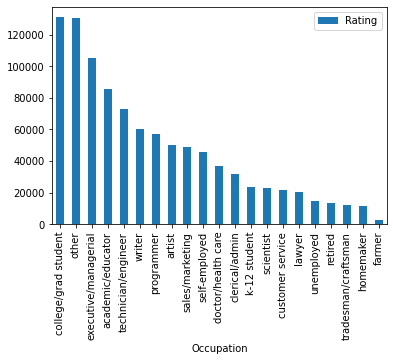

In [ ]:
Occupation_wise_ratings.plot.bar(x='Occupation',y='Rating')
plt.show()

***College/grad student***

###3.Most of the users in our dataset who’ve rated the movies are Male. (T/F)



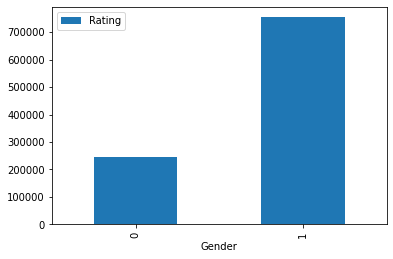

In [ ]:
Gender_wise_ratings.plot.bar(x='Gender',y='Rating')
plt.show()

***Yes,,Male were more***

###4.Most of the movies present in our dataset were released in which decade?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


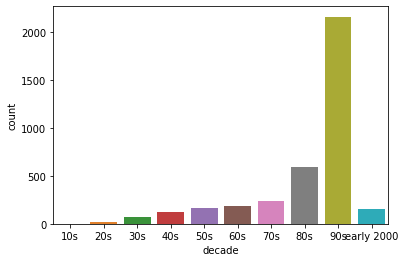

In [ ]:
sns.countplot((df1[['Movie_id','decade']].drop_duplicates())['decade'])
plt.show()

***It is 90's***

###5.The movie with maximum no. of ratings is ___.

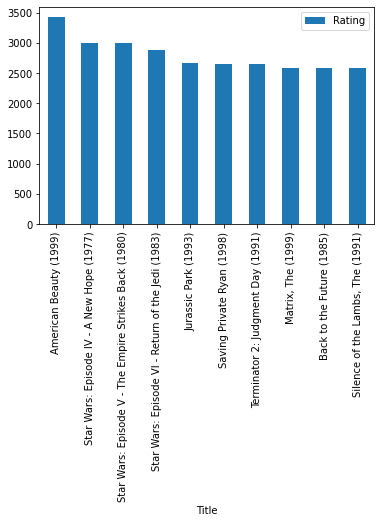

In [ ]:
Movie_wise_rating.head(10).plot.bar(x='Title',y='Rating')
plt.show()

***American Beauty got more ratings count***

###6.Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.

In [ ]:
movies[movies['Title'].str.startswith('Liar Liar')]

,Movie_id,Title,Genres,Year
523,1485,Liar Liar (1997),[Comedy],1997.0


In [ ]:
print("HI, Please provide watched movie_id {1 to 3952} and no.of recommended movies you want")
watched_movie_id=(input())
print('No.of recommended_movies you want')
recommended_movies=int(input())

if (watched_movie_id) in movies['Movie_id'].values:
  # print('in')
  query=[watched_movie_id]*recommended_movies
  # print(query)
  # indices=(np.array(cosine_similarity_matrix.loc[watched_movie_id]).argsort())[::-1]

  candidate_column_ids=list(cosine_similarity_matrix.columns[list(np.array(cosine_similarity_matrix.loc[watched_movie_id]).argsort())[::-1]])
  candidate_column_ids.remove(watched_movie_id)
  candidate_column_ids=candidate_column_ids[:recommended_movies]
  # print(candidate_column_ids)
  correlation_values=list(cosine_similarity_matrix.loc[watched_movie_id,candidate_column_ids])[:recommended_movies]
  # print(correlation_values)
  


  df=pd.DataFrame({'query':query,'movie_id':candidate_column_ids,'cosine':correlation_values})
  df=df.merge(movies[['Movie_id', 'Title']], left_on='query', right_on='Movie_id').rename(columns={'Title': 'query_tittle'}).drop(columns=['Movie_id'])
  df=df.merge(movies[['Movie_id', 'Title']], left_on='movie_id', right_on='Movie_id').rename(columns={'Title': 'candidate_tittle'}).drop(columns=['Movie_id'])
  print(df)

else:
  print('Sorry, the id is not found, please try another')

HI, Please provide watched movie_id {1 to 3952} and no.of recommended movies you want
1485
No.of recommended_movies you want
6
  query movie_id    cosine      query_tittle  \
0  1485     3655  0.999817  Liar Liar (1997)   
1  1485      383  0.999793  Liar Liar (1997)   
2  1485       24  0.999765  Liar Liar (1997)   

                     candidate_tittle  
0  Blow-Out (La Grande Bouffe) (1973)  
1                   Wyatt Earp (1994)  
2                       Powder (1995)  


***The top 3 movies similar to Liar Liar are as above***

###7.On the basis of approach, Collaborative Filtering methods can be classified into ___-based and ___-based.

***Item to item similarity and user based filtering***

###8.Pearson Correlation ranges between ___ to ___ whereas, Cosine Similarity belongs to the interval between ___ to

***Pearson ranges from -1 to 1 and cosine similarity range between 0 to 1***

###9.Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.

***rmse 1.41 , mape 0.41***

###10.Give the sparse ‘row’ matrix representation for the following dense matrix -



In [ ]:
from scipy import sparse

In [ ]:
sparse_matrix=sparse.csr_matrix(np.array([[1,0],[3,7]]))

In [ ]:
sparse_matrix

<2x2 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [ ]:
print(sparse_matrix)

  (0, 0)	1
  (1, 0)	3
  (1, 1)	7
